In [116]:
from sklearn.datasets import load_digits # carrega o toy dataset dos digitos 

#algumas métricas que usaremos para calcular a assertividade do nosso modelos
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# biblioteca para plotar imagens
from matplotlib import pyplot as plt

# bibliotecas para manipulaão dos datasets
import numpy as np
import pandas as pd

In [117]:
X, Y = load_digits(n_class=2, return_X_y=True) # carrega apenas as classes 0 e 1 do dataset de digitos

In [118]:
limiar_pixel_preto = 2
X = np.where(X<=limiar_pixel_preto, 0, X)
X = np.where(X>limiar_pixel_preto, 1, X)

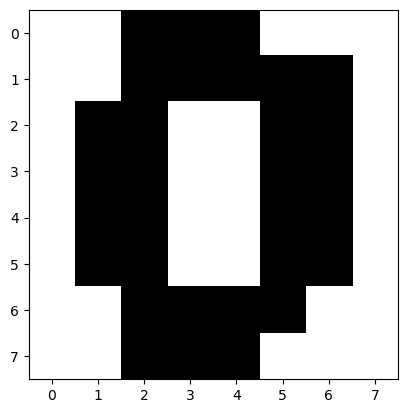

In [128]:
plt.imshow(X[0].reshape(8,8), interpolation='nearest', cmap='Greys')
plt.show()

In [120]:
medias = X.mean(axis=1)

In [121]:
dataset_validacao = pd.DataFrame(np.concatenate([[medias], 
                                                 [Y], 
                                                 [np.count_nonzero(X, axis=1)]], axis=0).T, 
                                 columns=['media', 'label', 'pixels_pretos'])

In [122]:
dataset_validacao.groupby('label').agg(['mean', 'max', 'min'])

media                     pixels_pretos            
           mean       max       min          mean   max   min
label                                                        
0.0    0.487535  0.578125  0.359375     31.202247  37.0  23.0
1.0    0.409942  0.578125  0.250000     26.236264  37.0  16.0

In [123]:
dataset_validacao['predicao'] = (np.count_nonzero(X, axis=1) < 29).astype(int)

In [124]:
dataset_validacao

,media,label,pixels_pretos,predicao
0,0.484375,0.0,31.0,0
1,0.406250,1.0,26.0,1
2,0.500000,0.0,32.0,0
3,0.390625,1.0,25.0,1
4,0.453125,0.0,29.0,0
...,...,...,...,...
355,0.437500,1.0,28.0,1
356,0.531250,1.0,34.0,0
357,0.468750,0.0,30.0,0
358,0.484375,1.0,31.0,0


In [125]:
accuracy_score(dataset_validacao['label'], dataset_validacao['predicao'])

0.8194444444444444

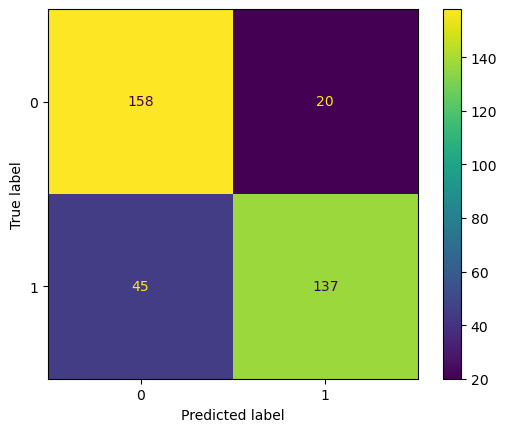

In [126]:
disp = ConfusionMatrixDisplay(confusion_matrix(dataset_validacao['label'], dataset_validacao['predicao']))
disp.plot()